In [49]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import urllib.request

In [50]:
# counrty data from johns hopkins
url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
urllib.request.urlretrieve(url, '/Users/pauldesalvo/Documents/notebooks/covid_datasets/time_series_covid19_confirmed_global.csv')

('/Users/pauldesalvo/Documents/notebooks/covid_datasets/time_series_covid19_confirmed_global.csv',
 <http.client.HTTPMessage at 0x7fa8bff954d0>)

In [51]:
#state data from new york times
url_states = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
urllib.request.urlretrieve(url_states, '/Users/pauldesalvo/Documents/notebooks/covid_datasets/us-states.csv')

('/Users/pauldesalvo/Documents/notebooks/covid_datasets/us-states.csv',
 <http.client.HTTPMessage at 0x7fa8c0f46b50>)

In [52]:
countries_df = pd.read_csv('covid_datasets/time_series_covid19_confirmed_global.csv')

In [53]:
states_df = pd.read_csv('covid_datasets/us-states.csv')

In [54]:
pd.set_option('display.max_rows', 500)

In [55]:
countries_df.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.076624   22.829441    2.086466    2.458647    3.537594    5.390977   
std     24.904600   70.191330   27.279200   27.377862   34.083035   47.434934   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.677575  -15.277675    0.000000    0.000000    0.000000    0.000000   
50%     22.820850   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.913685    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       7/14/20  \
count   266.000000   266.000000   266.000000   266.000000  ...  2.660000e+02   
mean      7.962406    11.003759    20.969925    23.180451  ...  5.011131e+04   
std      66.289178    89.313757   219.187744   220.524977  ...  2.559110e+05   
min       0.000000     0.000000     0.000000     0.000000  ...  0.000000e+00   
25%       0.000000     0.000000     0.000000     0.000000  ...  2.362500e+02   
50%       0.000000     0.000000     0.000000     0.000000  ...  1.425000e+03   
75%       0.000000     0.000000     0.000000     0.000000  ...  1.327100e+04   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  3.431574e+06   

            7/15/20       7/16/20       7/17/20       7/18/20       7/19/20  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   5.098018e+04  5.192958e+04  5.283950e+04  5.373286e+04  5.453981e+04   
std    2.610084e+05  2.667936e+05  2.720146e+05  2.767198e+05  2.812228e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.362500e+02  2.495000e+02  2.495000e+02  2.495000e+02  2.495000e+02   
50%    1.462000e+03  1.511000e+03  1.589000e+03  1.591500e+03  1.608500e+03   
75%    1.345700e+04  1.359750e+04  1.370725e+04  1.389775e+04  1.407550e+04   
max    3.498902e+06  3.576157e+06  3.647715e+06  3.711413e+06  3.773260e+06   

            7/20/20       7/21/20       7/22/20       7/23/20  
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  
mean   5.531717e+04  5.619482e+04  5.724975e+04  5.831262e+04  
std    2.855753e+05  2.906568e+05  2.969390e+05  3.029798e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    2.495000e+02  2.495000e+02  2.502500e+02  2.565000e+02  
50%    1.644000e+03  1.658000e+03  1.689500e+03  1.702000e+03  
75%    1.425850e+04  1.447925e+04  1.478700e+04  1.545100e+04  
max    3.834677e+06  3.899211e+06  3.970085e+06  4.038748e+06  

[8 rows x 186 columns]

In [7]:
countries_df['7 day change'] = countries_df.iloc[:,-1] / (countries_df.iloc[:,len(countries_df.columns) - 7]) -1


In [8]:
countries_df

Province/State                    Country/Region  \
0                                 NaN                       Afghanistan   
1                                 NaN                           Albania   
2                                 NaN                           Algeria   
3                                 NaN                           Andorra   
4                                 NaN                            Angola   
5                                 NaN               Antigua and Barbuda   
6                                 NaN                         Argentina   
7                                 NaN                           Armenia   
8        Australian Capital Territory                         Australia   
9                     New South Wales                         Australia   
10                 Northern Territory                         Australia   
11                         Queensland                         Australia   
12                    South Australia                         Australia   
13                           Tasmania                         Australia   
14                           Victoria                         Australia   
15                  Western Australia                         Australia   
16                                NaN                           Austria   
17                                NaN                        Azerbaijan   
18                                NaN                           Bahamas   
19                                NaN                           Bahrain   
20                                NaN                        Bangladesh   
21                                NaN                          Barbados   
22                                NaN                           Belarus   
23                                NaN                           Belgium   
24                                NaN                             Benin   
25                                NaN                            Bhutan   
26                                NaN                           Bolivia   
27                                NaN            Bosnia and Herzegovina   
28                                NaN                            Brazil   
29                                NaN                            Brunei   
30                                NaN                          Bulgaria   
31                                NaN                      Burkina Faso   
32                                NaN                        Cabo Verde   
33                                NaN                          Cambodia   
34                                NaN                          Cameroon   
35                            Alberta                            Canada   
36                   British Columbia                            Canada   
37                     Grand Princess                            Canada   
38                           Manitoba                            Canada   
39                      New Brunswick                            Canada   
40          Newfoundland and Labrador                            Canada   
41                        Nova Scotia                            Canada   
42                            Ontario                            Canada   
43               Prince Edward Island                            Canada   
44                             Quebec                            Canada   
45                       Saskatchewan                            Canada   
46                                NaN          Central African Republic   
47                                NaN                              Chad   
48                                NaN                             Chile   
49                              Anhui                             China   
50                            Beijing                             China   
51                          Chongqing                             China   
52                             Fujian           

In [9]:
date_column = list(countries_df.columns)[4:-2]

In [10]:
#pd.set_option('display.max_rows', 500)

#countries_df.dtypes

In [11]:
#use the diff to turn the cumulative data into new daily cases
diff_df = countries_df.iloc[:,4:-1].diff(axis=1)

In [12]:
diff_df

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9        NaN      0.0      0.0      0.0      3.0      1.0      0.0      0.0   
10       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11       NaN      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
12       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
13       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14       NaN      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
15       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
16       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
17       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
18       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
19       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
20       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
21       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
22       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
24       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
26       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
27       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
28       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
29       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
30       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
31       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
32       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
33       NaN      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
34       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
35       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
36       NaN      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
37       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
38       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
39       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
40       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
41       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
42       NaN      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
43       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
44       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
45       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
46       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
47       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
48       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
49       NaN      8.0      6.0     24.0     21.0     10

In [13]:
#Select countries only and the 7 day change column
countries_only_df = countries_df.iloc[:, np.r_[:4,-1]]

In [14]:
countries_only_df

Province/State                    Country/Region  \
0                                 NaN                       Afghanistan   
1                                 NaN                           Albania   
2                                 NaN                           Algeria   
3                                 NaN                           Andorra   
4                                 NaN                            Angola   
5                                 NaN               Antigua and Barbuda   
6                                 NaN                         Argentina   
7                                 NaN                           Armenia   
8        Australian Capital Territory                         Australia   
9                     New South Wales                         Australia   
10                 Northern Territory                         Australia   
11                         Queensland                         Australia   
12                    South Australia                         Australia   
13                           Tasmania                         Australia   
14                           Victoria                         Australia   
15                  Western Australia                         Australia   
16                                NaN                           Austria   
17                                NaN                        Azerbaijan   
18                                NaN                           Bahamas   
19                                NaN                           Bahrain   
20                                NaN                        Bangladesh   
21                                NaN                          Barbados   
22                                NaN                           Belarus   
23                                NaN                           Belgium   
24                                NaN                             Benin   
25                                NaN                            Bhutan   
26                                NaN                           Bolivia   
27                                NaN            Bosnia and Herzegovina   
28                                NaN                            Brazil   
29                                NaN                            Brunei   
30                                NaN                          Bulgaria   
31                                NaN                      Burkina Faso   
32                                NaN                        Cabo Verde   
33                                NaN                          Cambodia   
34                                NaN                          Cameroon   
35                            Alberta                            Canada   
36                   British Columbia                            Canada   
37                     Grand Princess                            Canada   
38                           Manitoba                            Canada   
39                      New Brunswick                            Canada   
40          Newfoundland and Labrador                            Canada   
41                        Nova Scotia                            Canada   
42                            Ontario                            Canada   
43               Prince Edward Island                            Canada   
44                             Quebec                            Canada   
45                       Saskatchewan                            Canada   
46                                NaN          Central African Republic   
47                                NaN                              Chad   
48                                NaN                             Chile   
49                              Anhui                             China   
50                            Beijing                             China   
51                          Chongqing                             China   
52                             Fujian           

In [15]:
#.sort_values(by=countries_df.columns[-1], ascending=False)

In [16]:
merge1 = pd.concat([countries_only_df,diff_df], axis = 1, join = 'inner')

In [17]:
country_new_daily_cases = merge1.sort_values(by=merge1.columns[-1], ascending = False)

In [18]:
top_20_countries = country_new_daily_cases[:20]

In [19]:
df_new = pd.melt(frame=top_20_countries, id_vars=['Country/Region','Lat','Long','7 day change'], value_vars=date_column,  value_name="Number of Cases", var_name="Date")

In [20]:
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m/%d/%y') 

In [21]:

df_new['Country (7 day change)']= df_new["Country/Region"] + ' (' + (round((df_new["7 day change"]*100),1)).map(str) + '%)'

In [22]:
df_new.head(5000)

Country/Region        Lat        Long  7 day change       Date  \
0                US  40.000000 -100.000000      0.107199 2020-01-22   
1            Brazil -14.235000  -51.925300      0.117844 2020-01-22   
2             India  20.593684   78.962880      0.239657 2020-01-22   
3      South Africa -30.559500   22.937500      0.208706 2020-01-22   
4            Mexico  23.634500 -102.552800      0.118968 2020-01-22   
...             ...        ...         ...           ...        ...   
3655     Kyrgyzstan  41.204380   74.766098      1.385085 2020-07-22   
3656   Saudi Arabia  23.885942   45.079162      0.059154 2020-07-22   
3657    Philippines  12.879721  121.774017      0.180775 2020-07-22   
3658      Indonesia  -0.789300  113.921300      0.126633 2020-07-22   
3659         Israel  31.046051   34.851612      0.221728 2020-07-22   

      Number of Cases Country (7 day change)  
0                 NaN             US (10.7%)  
1                 NaN         Brazil (11.8%)  
2                 NaN          India (24.0%)  
3                 NaN   South Africa (20.9%)  
4                 NaN         Mexico (11.9%)  
...               ...                    ...  
3655            729.0    Kyrgyzstan (138.5%)  
3656           2331.0    Saudi Arabia (5.9%)  
3657           1505.0    Philippines (18.1%)  
3658           1882.0      Indonesia (12.7%)  
3659           2043.0         Israel (22.2%)  

[3660 rows x 7 columns]

In [23]:
#total_cases_by_country = (df_new[df_new.Date == df_new.Date.max()].sort_values('Number of Cases', ascending = False)) 

In [24]:
#total_cases_by_country.reset_index()

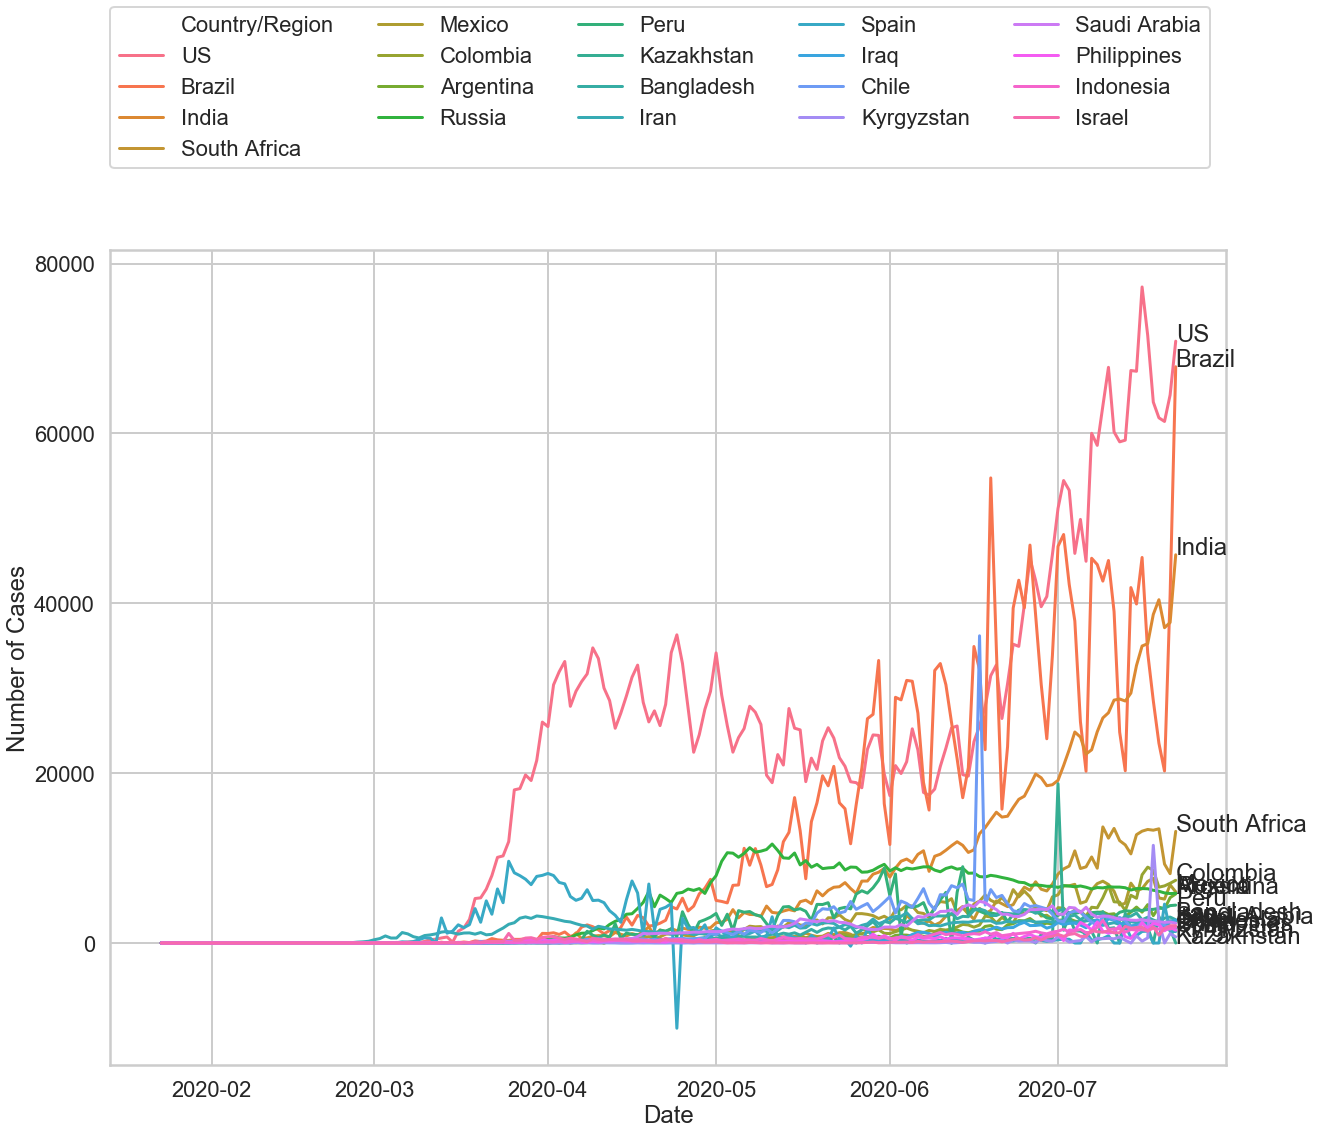

In [25]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data = df_new, x='Date', y='Number of Cases', hue = 'Country/Region')
plt.legend(ncol = 5,loc = (0,1.1))

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

filt = df_new[df_new.Date == df_new.Date.max()]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

plt.show()

# Rolling Average

In [26]:
#now we can find the rolling average
rolling_avg_df = diff_df.rolling(window=7, axis = 1).mean()

In [27]:
merge2 = pd.concat([countries_only_df,rolling_avg_df], axis = 1, join = 'inner')

In [28]:
country_new_daily_cases_rolling_avg = merge2.sort_values(by=merge2.columns[-1], ascending = False)

In [29]:
top_20_countries_roll = country_new_daily_cases_rolling_avg[:20]

In [30]:
countries_rolling_average = pd.melt(frame=top_20_countries_roll, id_vars=['Country/Region','Lat','Long'], value_vars=date_column,  value_name="Number of Cases", var_name="Date")

In [31]:
countries_rolling_average['Date'] = pd.to_datetime(countries_rolling_average['Date'], format='%m/%d/%y') 

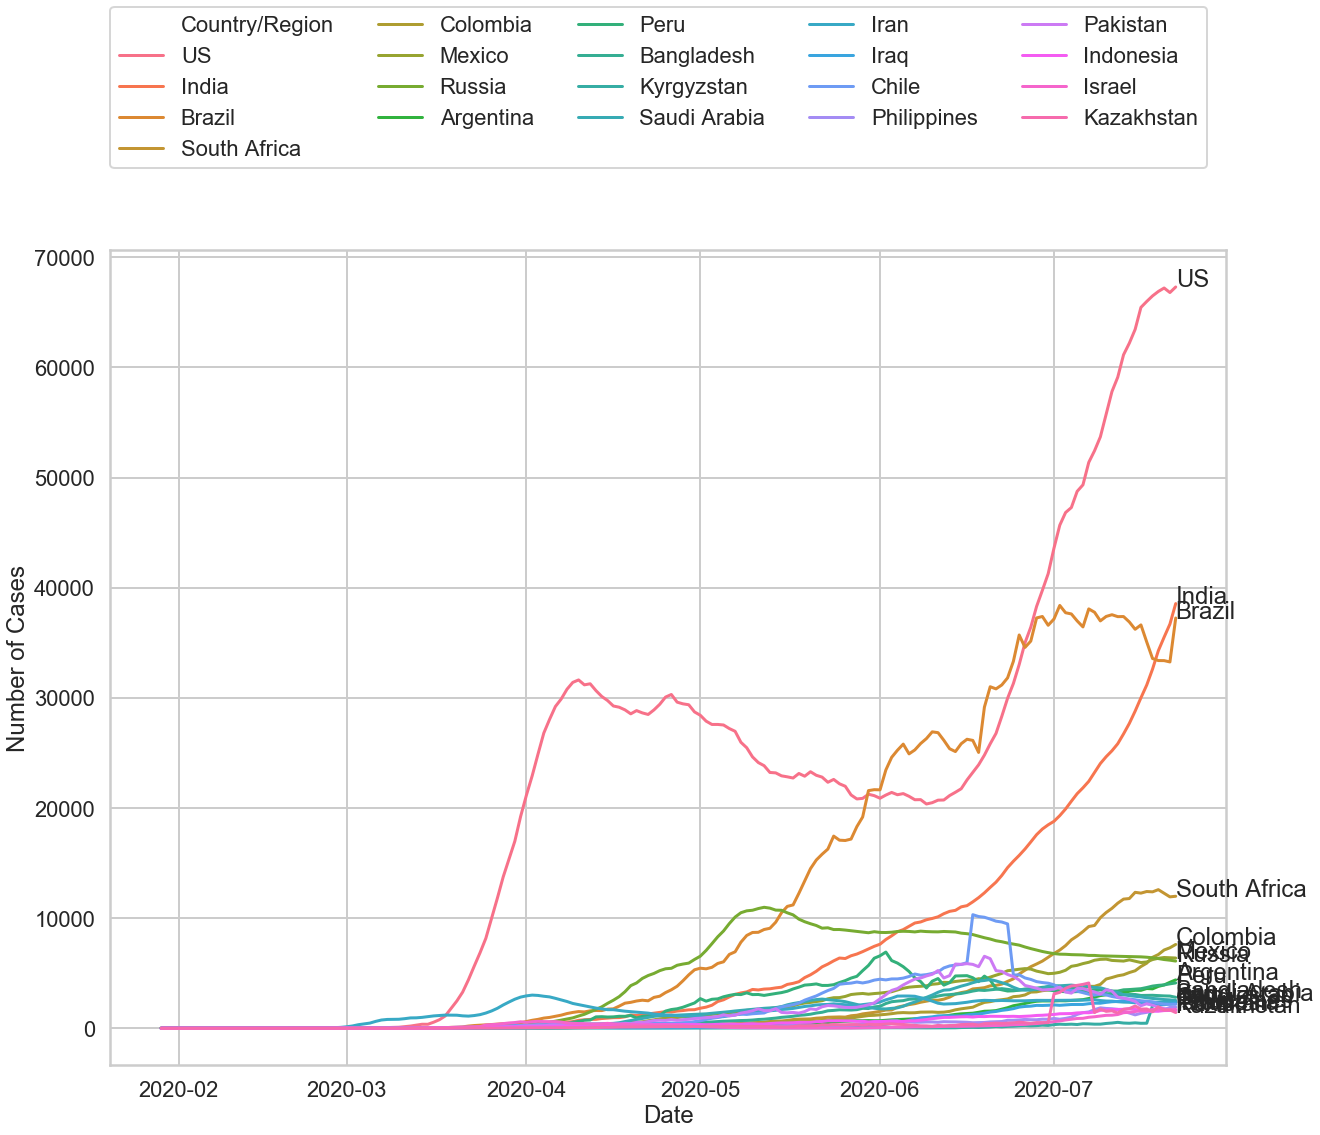

In [32]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data = countries_rolling_average, x='Date', y='Number of Cases', hue = 'Country/Region')
plt.legend(ncol = 5,loc = (0,1.1))

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

filt = countries_rolling_average[df_new.Date == df_new.Date.max()]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

plt.show()

In [33]:
filt[:3]

Country/Region        Lat       Long       Date  Number of Cases
3640             US  40.000000 -100.00000 2020-07-22     67311.857143
3641          India  20.593684   78.96288 2020-07-22     38563.000000
3642         Brazil -14.235000  -51.92530 2020-07-22     37252.285714

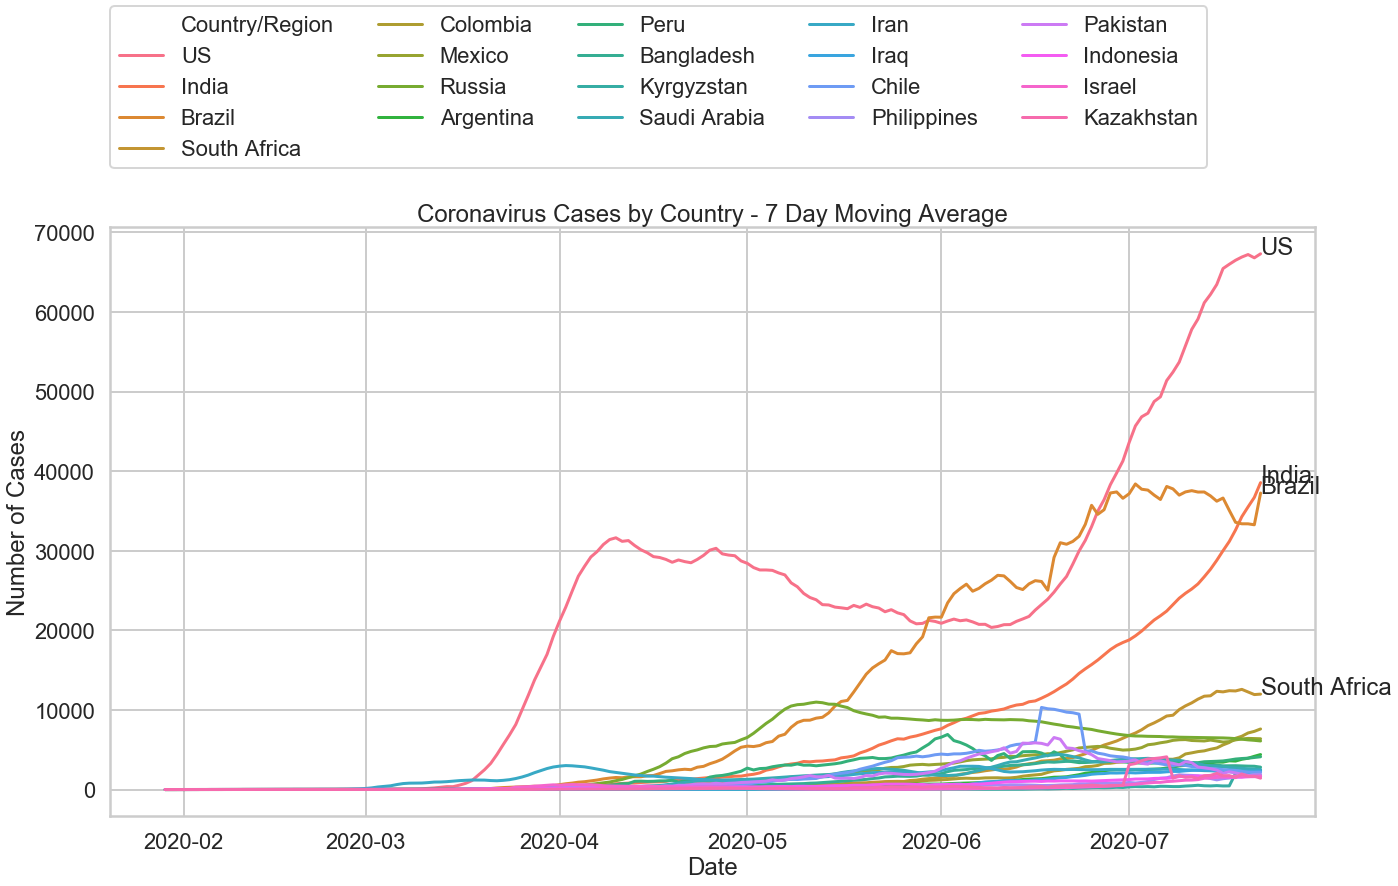

In [34]:
# get a closer look at the lower countries
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,13))

sns.lineplot(data = countries_rolling_average, x='Date', y='Number of Cases', hue = 'Country/Region')

#ax.set_yticks(range(0,8000,1000))
#plt.ylim(0,10000)
#plt.margins(y=12000)

plt.legend(ncol = 5,loc = (0,1.1))
plt.title('Coronavirus Cases by Country - 7 Day Moving Average')

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

#return only the first 4 countries labels becasue the rest just overlap
filt = countries_rolling_average[df_new.Date == df_new.Date.max()][:4]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

f.tight_layout()
plt.savefig('covid_cases_by_country.png')
plt.show()


# Country by Country Data

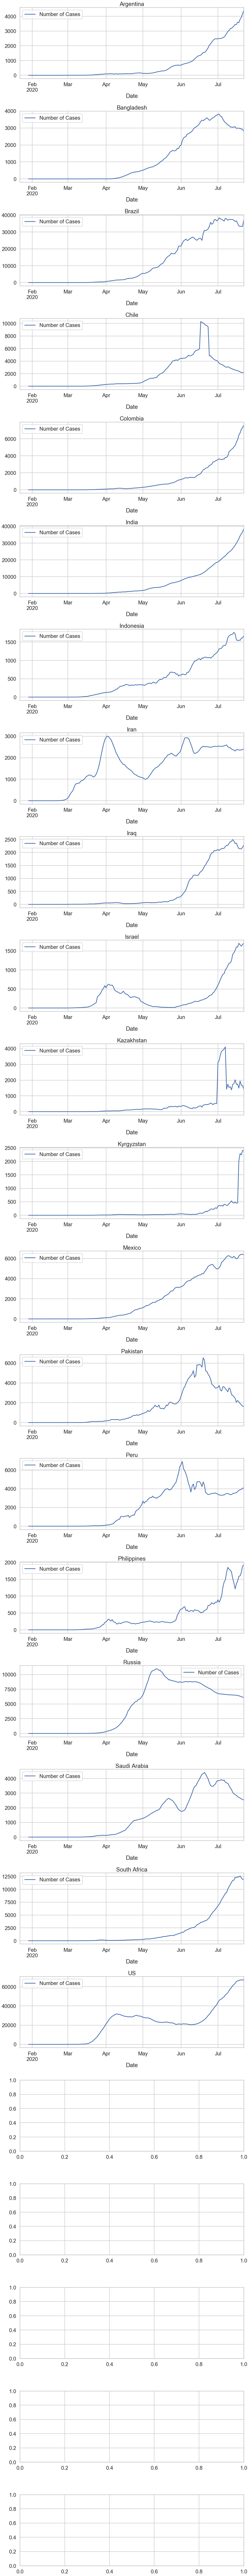

In [35]:
fig, axes = plt.subplots(25,1, figsize=(15,150))
for (year, group), ax in zip(countries_rolling_average.groupby('Country/Region'), axes.flatten()):
    group.plot(x='Date', y='Number of Cases', kind='line', ax=ax, title=year)
    
fig.tight_layout()

# Sorting by biggest Change

In [36]:
df_sorted = df_new.sort_values(by = '7 day change', ascending = False)

In [37]:
df_sorted.reset_index()

index Country/Region       Lat       Long  7 day change       Date  \
0      1195     Kyrgyzstan  41.20438  74.766098      1.385085 2020-03-21   
1      1415     Kyrgyzstan  41.20438  74.766098      1.385085 2020-04-01   
2      2795     Kyrgyzstan  41.20438  74.766098      1.385085 2020-06-09   
3      2595     Kyrgyzstan  41.20438  74.766098      1.385085 2020-05-30   
4      2695     Kyrgyzstan  41.20438  74.766098      1.385085 2020-06-04   
...     ...            ...       ...        ...           ...        ...   
3655   3434          Chile -35.67510 -71.543000      0.037741 2020-07-11   
3656   2454          Chile -35.67510 -71.543000      0.037741 2020-05-23   
3657   1334          Chile -35.67510 -71.543000      0.037741 2020-03-28   
3658   2834          Chile -35.67510 -71.543000      0.037741 2020-06-11   
3659   2054          Chile -35.67510 -71.543000      0.037741 2020-05-03   

      Number of Cases Country (7 day change)  
0                 8.0    Kyrgyzstan (138.5%)  
1                 4.0    Kyrgyzstan (138.5%)  
2                23.0    Kyrgyzstan (138.5%)  
3                60.0    Kyrgyzstan (138.5%)  
4                28.0    Kyrgyzstan (138.5%)  
...               ...                    ...  
3655           2755.0           Chile (3.8%)  
3656           3536.0           Chile (3.8%)  
3657            299.0           Chile (3.8%)  
3658           5636.0           Chile (3.8%)  
3659           1228.0           Chile (3.8%)  

[3660 rows x 8 columns]

In [38]:
fig, axes = plt.subplots(10,2, figsize=(100,100))
for (year, group), ax in zip(df_new.groupby('Country (7 day change)'), axes.flatten()):
    group.plot(x='Date', y='Number of Cases', kind='line', ax=ax, title=year)
    
fig.tight_layout()
plt.savefig('cases_by_country.png')

In [39]:
test = df_new.groupby('Country (7 day change)')
print(test)

# Silly Video

In [40]:
heatmap_df = countries_df[countries_df['Province/State'].isna()]

In [41]:
heatmap_df

Province/State                    Country/Region        Lat        Long  \
0              NaN                       Afghanistan  33.939110   67.709953   
1              NaN                           Albania  41.153300   20.168300   
2              NaN                           Algeria  28.033900    1.659600   
3              NaN                           Andorra  42.506300    1.521800   
4              NaN                            Angola -11.202700   17.873900   
5              NaN               Antigua and Barbuda  17.060800  -61.796400   
6              NaN                         Argentina -38.416100  -63.616700   
7              NaN                           Armenia  40.069100   45.038200   
16             NaN                           Austria  47.516200   14.550100   
17             NaN                        Azerbaijan  40.143100   47.576900   
18             NaN                           Bahamas  25.025885  -78.035889   
19             NaN                           Bahrain  26.027500   50.550000   
20             NaN                        Bangladesh  23.685000   90.356300   
21             NaN                          Barbados  13.193900  -59.543200   
22             NaN                           Belarus  53.709800   27.953400   
23             NaN                           Belgium  50.833300    4.469936   
24             NaN                             Benin   9.307700    2.315800   
25             NaN                            Bhutan  27.514200   90.433600   
26             NaN                           Bolivia -16.290200  -63.588700   
27             NaN            Bosnia and Herzegovina  43.915900   17.679100   
28             NaN                            Brazil -14.235000  -51.925300   
29             NaN                            Brunei   4.535300  114.727700   
30             NaN                          Bulgaria  42.733900   25.485800   
31             NaN                      Burkina Faso  12.238300   -1.561600   
32             NaN                        Cabo Verde  16.538800  -23.041800   
33             NaN                          Cambodia  11.550000  104.916700   
34             NaN                          Cameroon   3.848000   11.502100   
46             NaN          Central African Republic   6.611100   20.939400   
47             NaN                              Chad  15.454200   18.732200   
48             NaN                             Chile -35.675100  -71.543000   
82             NaN                          Colombia   4.570900  -74.297300   
83             NaN               Congo (Brazzaville)  -0.228000   15.827700   
84             NaN                  Congo (Kinshasa)  -4.038300   21.758700   
85             NaN                        Costa Rica   9.748900  -83.753400   
86             NaN                     Cote d'Ivoire   7.540000   -5.547100   
87             NaN                           Croatia  45.100000   15.200000   
88             NaN                  Diamond Princess   0.000000    0.000000   
89             NaN                              Cuba  21.521757  -77.781167   
90             NaN                            Cyprus  35.126400   33.429900   
91             NaN                           Czechia  49.817500   15.473000   
94             NaN                           Denmark  56.263900    9.501800   
95             NaN                          Djibouti  11.825100   42.590300   
96             NaN                Dominican Republic  18.735700  -70.162700   
97             NaN                           Ecuador  -1.831200  -78.183400   
98             NaN                             Egypt  26.820553   30.802498   
99             NaN                       El Salvador  13.794200  -88.896500   
100            NaN                 Equatorial Guinea   1.650800   10.267900   
101            NaN                           Eritrea  15.179400   39.782300   
102            NaN                           Estonia  58.595300   25.013600   
103            NaN                          Eswatini -

In [42]:
heatmap_df = heatmap_df.iloc[:, np.r_[1,4:len(heatmap_df.columns)-1]]

In [43]:
heatmap_df = heatmap_df.fillna(0)

In [44]:
heatmap_df = heatmap_df.set_index('Country/Region')


In [45]:
transposed_df = heatmap_df.transpose()

In [46]:
import bar_chart_race as bcr
df = transposed_df
bcr.bar_chart_race(
    df=df,
    filename='covid19_horiz.mp4',
    orientation='h',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='COVID-19 Deaths by Country',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  

/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.

/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


# Quick Testing

In [47]:
test_df = countries_df[['7/17/20','7/18/20','7/19/20','7/20/20','7/21/20','7/22/20']]

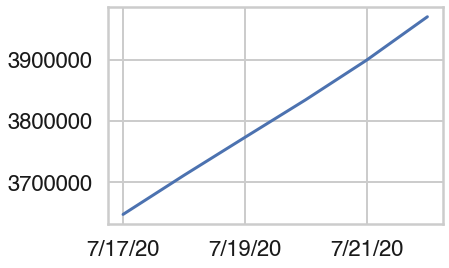

In [48]:
test_df.iloc[225].plot()